TRAIN DATASET

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import xgboost as xgb
import numpy as np
import shutil
import sys
import os
import random
from pathlib import Path
import imageio
import skimage
import skimage.io
import skimage.transform
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import scipy
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Dropout, BatchNormalization,LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical
#import tensorflow_addons as tfa
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import tensorflow as tf

In [3]:
excel1=pd.read_excel('/content/drive/MyDrive/event datasets/Book(i4).xlsx')
excel2=pd.read_excel('/content/drive/MyDrive/event datasets/Book(i48).xlsx')
excel3=pd.read_excel('/content/drive/MyDrive/event datasets/Book1.xlsx')
excel4=pd.read_excel('/content/drive/MyDrive/event datasets/Book3.xlsx')
excel5=pd.read_excel('/content/drive/MyDrive/event datasets/Book5.xlsx')

In [4]:
excel1.to_csv('m1.csv', index=False)
excel2.to_csv('m2.csv', index=False)
excel3.to_csv('m3.csv', index=False)
excel4.to_csv('m4.csv', index=False)
excel5.to_csv('m5.csv', index=False)

In [5]:
df1=pd.read_csv('m1.csv')
df2=pd.read_csv('m2.csv')
df3=pd.read_csv('m3.csv')
df4=pd.read_csv('m4.csv')
df5=pd.read_csv('m5.csv')

In [6]:
merged_df = pd.concat([df1, df2,df3,df4,df5], axis=1)

In [7]:
merged_df.to_csv('merged_data.csv', index=False)
source_file = 'merged_data.csv'
destination_file = '/content/drive/MyDrive/event datasets/merged_data.csv'
shutil.copy(source_file, destination_file)

'/content/drive/MyDrive/event datasets/merged_data.csv'

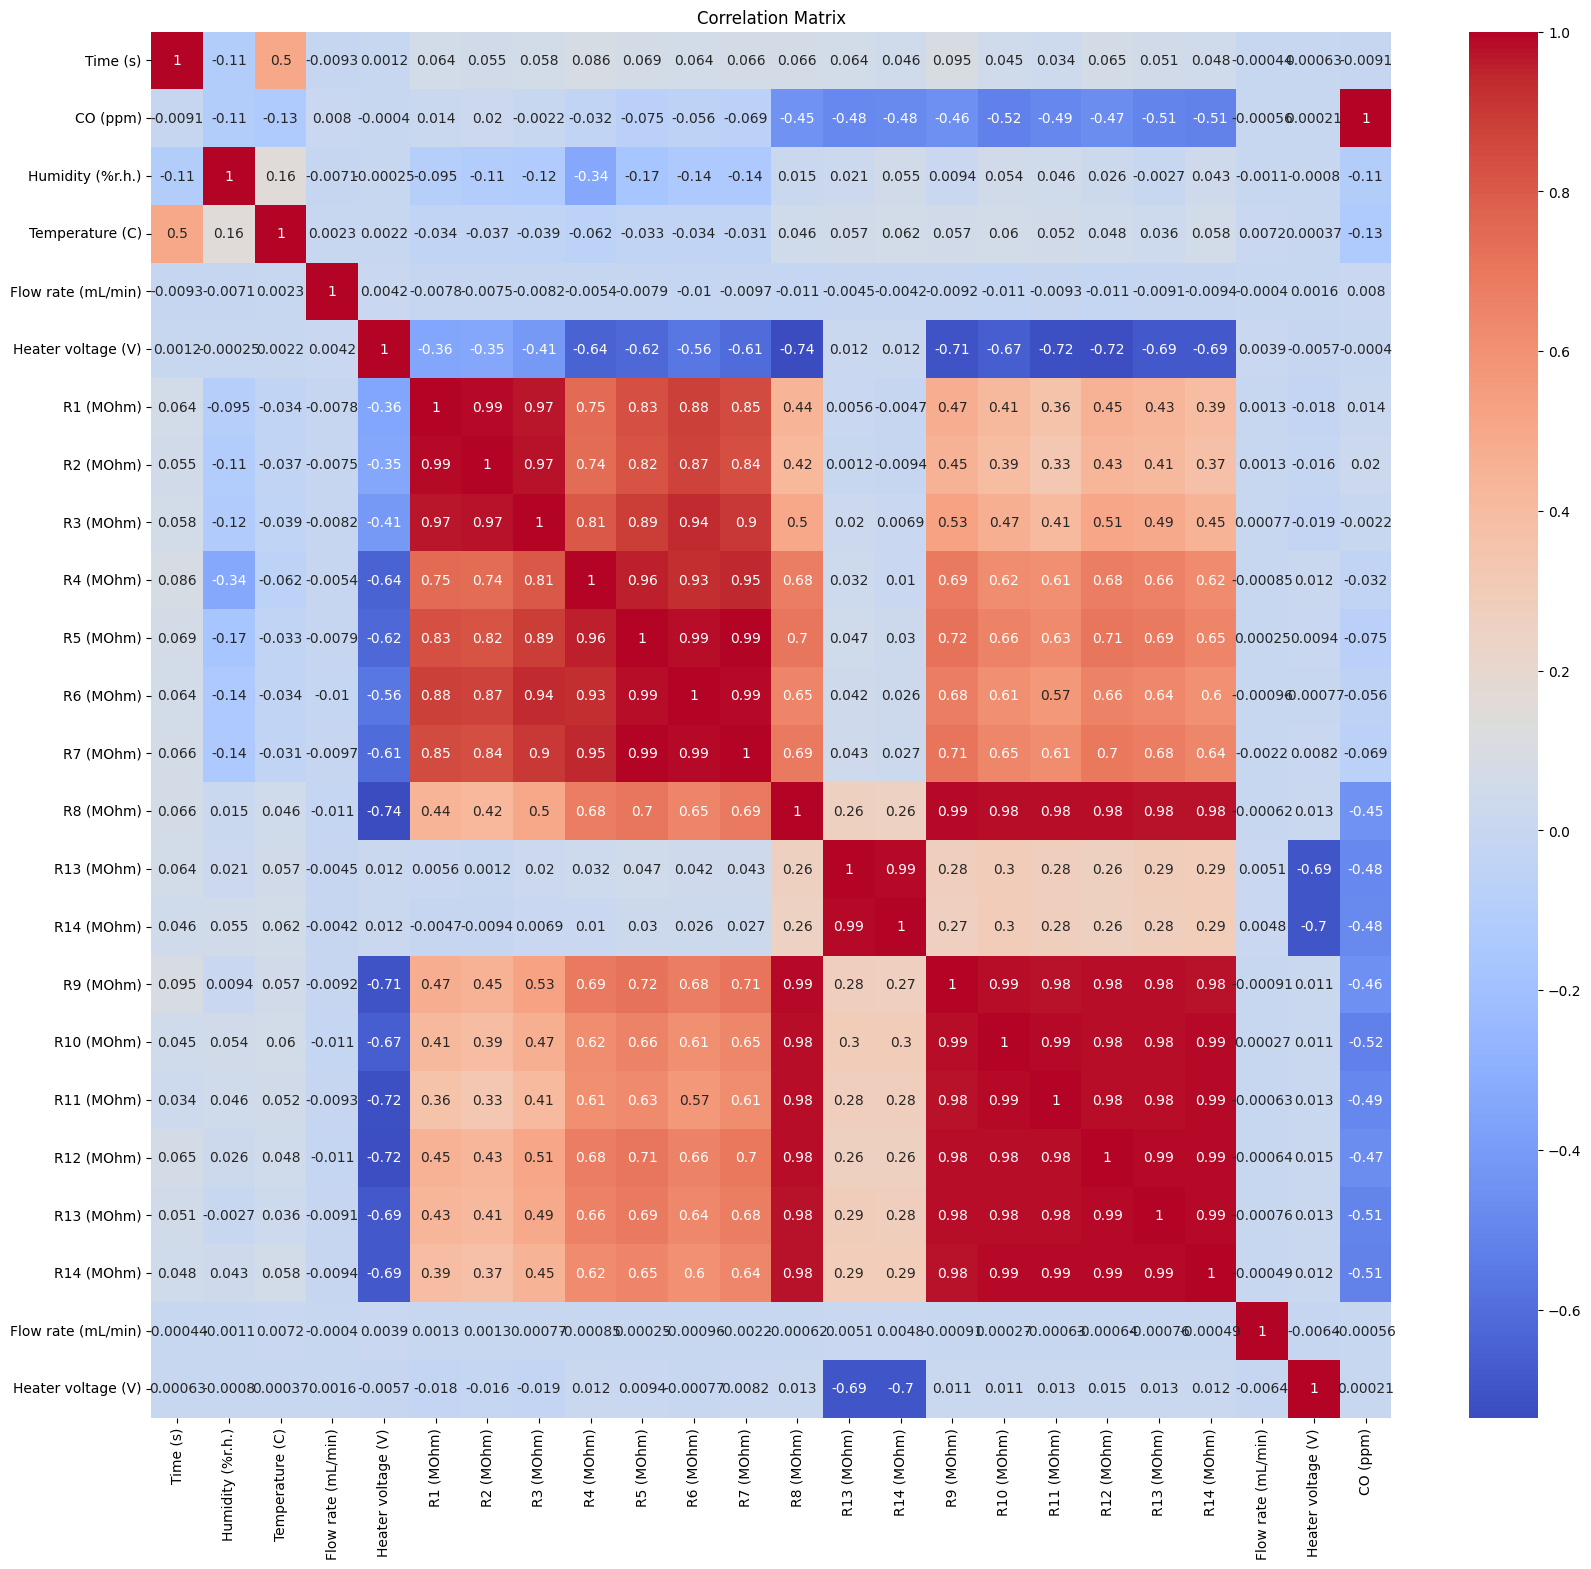

In [8]:
correlation_matrix = merged_df.corr()
correlation_matrix['CO (ppm)'] = correlation_matrix.pop('CO (ppm)')

plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [9]:
co_estim=merged_df[['Time (s)', 'CO (ppm)','Temperature (C)',
        'R1 (MOhm)', 'R2 (MOhm)',
        'R4 (MOhm)', 'R5 (MOhm)', 'R6 (MOhm)', 'R7 (MOhm)',
       'R8 (MOhm)', 'R13 (MOhm)', 'R14 (MOhm)', 'R9 (MOhm)', 'R10 (MOhm)',
       'R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)', 'R14 (MOhm)',
       ]]

In [10]:
co_estim.to_csv('prediction.csv', index=False)
missing=["N/a","na",np.nan]
pred_df=pd.read_csv('prediction.csv',na_values=missing)

In [11]:
pred_df.interpolate()
pred_df.fillna(0)

,Time (s),CO (ppm),Temperature (C),R1 (MOhm),R2 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),...,R14 (MOhm),R14 (MOhm).1,R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm).2,R13 (MOhm).3,R14 (MOhm).2,R14 (MOhm).3
0,0.000,0.0,23.7184,0.0000,0.0000,0.0000,1.2534,0.0000,1.9906,1.3303,...,0.0000,8.6385,0.0000,1.9148,3.4651,5.2144,40.0160,6.5806,0.0000,8.6385
1,0.309,0.0,26.6200,2.1314,5.3552,6.3188,0.0000,10.5769,13.6317,21.9829,...,53.4763,41.9167,16.1902,24.2780,31.1014,34.7193,39.0811,0.0000,53.4763,41.9167
2,0.618,0.0,26.6200,10.5318,22.5612,17.7848,33.0704,36.3160,42.5746,49.7495,...,55.2289,62.9436,31.7533,57.7289,53.6275,56.9212,39.8120,47.8255,55.2289,62.9436
3,0.926,0.0,26.6200,29.5749,0.0000,0.0000,58.3847,67.5130,68.0064,59.2824,...,54.5271,0.0000,0.0000,66.0832,66.8349,0.0000,39.0811,50.3730,54.5271,0.0000
4,1.234,0.0,0.0000,49.5111,67.0368,27.9625,71.7732,0.0000,79.8631,0.0000,...,53.8426,66.8445,0.0000,68.1441,62.0947,49.4614,38.9187,52.8453,53.8426,66.8445
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295876,0.000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,6.0728,0.0000,0.0000,0.0000
295877,0.000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,37.0376,0.0000,0.0000,0.0000
295878,0.000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,71.7899,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,71.7899,0.0000
295879,0.000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,74.9537,0.0000,0.0000,0.0000,0.0000,0.0000,61.9316,0.0000,74.9537,0.0000


In [12]:
pred_df.to_csv('prediction_.csv', index=False)

In [13]:
source_file = 'prediction_.csv'
destination_file = '/content/drive/MyDrive/event datasets/prediction_.csv'
shutil.copy(source_file, destination_file)

'/content/drive/MyDrive/event datasets/prediction_.csv'

TEST DATASET

In [14]:
test_df=pd.read_csv('/content/drive/MyDrive/event datasets/testing set.csv',na_values=missing)

In [15]:
trim_df=test_df[['Time (s)','Temperature (C)',
        'R1 (MOhm)', 'R2 (MOhm)',
        'R4 (MOhm)', 'R5 (MOhm)', 'R6 (MOhm)', 'R7 (MOhm)',
       'R8 (MOhm)', 'R13 (MOhm)', 'R14 (MOhm)', 'R9 (MOhm)', 'R10 (MOhm)',
       'R11 (MOhm)', 'R12 (MOhm)', 'R13 (MOhm)', 'R14 (MOhm)',
       ]]

In [16]:
trim_df.interpolate()
trim_df.fillna(0)

,Time (s),Temperature (C),R1 (MOhm),R2 (MOhm),R4 (MOhm),R5 (MOhm),R6 (MOhm),R7 (MOhm),R8 (MOhm),R13 (MOhm),R14 (MOhm),R9 (MOhm),R10 (MOhm),R11 (MOhm),R12 (MOhm),R13 (MOhm),R14 (MOhm)
0,73298.059,26.5400,1.9076,1.5491,19.5626,0.0000,27.7636,36.4079,27.1697,0.0000,27.8716,21.6868,25.5373,31.9314,26.9859,0.0000,27.8716
1,39657.889,26.2200,26.5940,36.8459,0.0000,63.4677,60.5782,64.5292,41.0575,40.0160,44.8085,0.0000,39.8853,0.0000,40.6368,40.0160,44.8085
2,0.000,26.2200,18.0553,25.5357,50.0544,69.5025,66.4281,71.3400,58.4235,52.2052,63.3641,51.7813,54.8161,62.9890,53.4361,52.2052,63.3641
3,60476.431,26.6199,0.4904,0.5267,4.1022,3.5816,2.5614,0.0000,20.9540,15.2109,20.2276,15.2577,17.5911,21.5547,0.0000,15.2109,20.2276
4,20535.490,26.3800,1.6856,1.3005,20.9492,26.7869,18.6831,26.7960,0.0000,0.0000,0.0000,18.0844,19.0424,23.9317,21.1555,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15167.720,26.3800,0.0905,0.1426,0.0000,0.1229,0.0000,0.1307,0.0996,0.1011,0.1067,0.0000,0.0000,0.0000,0.1078,0.1011,0.1067
9996,42115.221,26.3000,6.1407,3.5703,37.4095,63.0524,59.3098,0.0000,64.5356,52.8453,61.1567,47.9178,0.0000,57.5565,55.4749,52.8453,61.1567
9997,0.000,26.5000,13.2774,7.7470,29.0823,47.0253,43.9737,47.7780,56.4158,0.0000,0.0000,49.0530,54.8161,56.8068,51.8182,0.0000,0.0000
9998,42155.009,0.0000,30.3051,26.5940,38.8066,62.5610,67.0156,68.5895,57.2171,57.7974,67.3181,57.9460,62.7987,62.4980,58.8007,57.7974,67.3181


In [17]:
trim_df.to_csv('test.csv', index=False)
source_file = 'test.csv'
destination_file = '/content/drive/MyDrive/event datasets/test.csv'
shutil.copy(source_file, destination_file)

'/content/drive/MyDrive/event datasets/test.csv'

TRAINING THE MODEL

In [19]:
data = pd.read_csv('/content/drive/MyDrive/event datasets/prediction_.csv')
test = pd.read_csv('/content/drive/MyDrive/event datasets/test.csv')
X_train = data.drop('CO (ppm)', axis=1)
y_train = data['CO (ppm)']
y_train = y_train.fillna(0)
common_columns = list(set(X_train.columns).intersection(test.columns))
X_train = X_train[common_columns]
X_test = test[common_columns]
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [32]:
A=pd.DataFrame(y_pred,columns=['CO (ppm)'])
A
A.to_csv('Technauts.csv', index=False)
source_file = 'Technauts.csv'
destination_file = '/content/drive/MyDrive/event datasets/Technauts.csv'
shutil.copy(source_file, destination_file)

'/content/drive/MyDrive/event datasets/Technauts.csv'